<a href="https://colab.research.google.com/github/jacelyntan880-os/jacelyn-2331055/blob/main/Tugas%20Lab%20pertemuan%2010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Membaca file: /content/IMDB Dataset.csv
Shape: (50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Membersihkan teks...
Train size: 40000 Test size: 10000
X_train shape: (40000, 200) X_test shape: (10000, 200)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6597 - loss: 0.5765
Epoch 1: val_loss improved from inf to 0.38438, saving model to best_lstm_model.h5


282/282 ━━━━━━━━━━━━━━━━━━━━ 472s 2s/step - accuracy: 0.6600 - loss: 0.5761 - val_accuracy: 0.8328 - val_loss: 0.3844
Epoch 2/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8636 - loss: 0.3349
Epoch 2: val_loss improved from 0.38438 to 0.34020, saving model to best_lstm_model.h5


282/282 ━━━━━━━━━━━━━━━━━━━━ 409s 1s/step - accuracy: 0.8636 - loss: 0.3348 - val_accuracy: 0.8717 - val_loss: 0.3402
Epoch 3/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8881 - loss: 0.2907
Epoch 3: val_loss did not improve from 0.34020
282/282 ━━━━━━━━━━━━━━━━━━━━ 416s 1s/step - accuracy: 0.8881 - loss: 0.2907 - val_accuracy: 0.8633 - val_loss: 0.3612
Epoch 4/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9107 - loss: 0.2410
Epoch 4: val_loss did not improve from 0.34020
282/282 ━━━━━━━━━━━━━━━━━━━━ 408s 1s/step - accuracy: 0.9107 - loss: 0.2409 - val_accuracy: 0.8555 - val_loss: 0.3842

Evaluasi pada test set:
313/313 ━━━━━━━━━━━━━━━━━━━━ 59s 188ms/step - accuracy: 0.8657 - loss: 0.3505
Test loss: 0.3470   Test accuracy: 0.8689
313/313 ━━━━━━━━━━━━━━━━━━━━ 56s 177ms/step

Accuracy (sklearn): 0.8689

Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.87      0.87      5000
    positive       0.87      0.87 

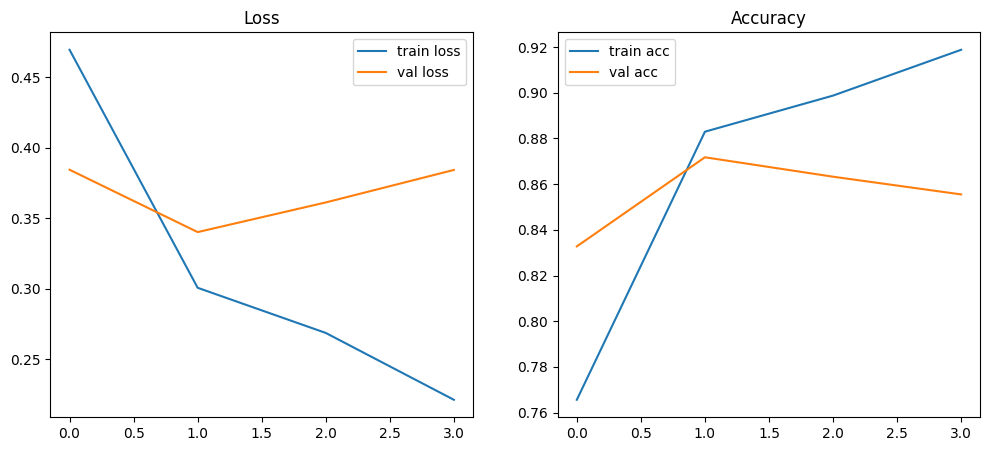

Model dan tokenizer disimpan: final_lstm_model.h5, tokenizer.pkl


In [18]:
import os
import random
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

possible_paths = [
    "/content/IMDB Dataset.csv",
    "/mnt/data/IMDB Dataset.csv",
    "/content/drive/MyDrive/IMDB Dataset.csv",
    "/content/drive/MyDrive/Lab. Artificial Intelligence/Pertemuan 10/IMDB-Dataset.csv"
]

csv_path = None
for p in possible_paths:
    if os.path.exists(p):
        csv_path = p
        break

if csv_path is None:
    from google.colab import files
    print("File IMDB Dataset.csv tidak ditemukan di path default. Silakan upload file CSV sekarang...")
    uploaded = files.upload()
    if len(uploaded) == 0:
        raise FileNotFoundError("Tidak ada file diupload.")
    csv_path = list(uploaded.keys())[0]

print("Membaca file:", csv_path)
data = pd.read_csv(csv_path)

print("Shape:", data.shape)
display(data.head())

expected_cols = {"review", "sentiment"}
if not expected_cols.issubset(set(data.columns)):
    raise ValueError(f"Dataset tidak memiliki kolom yang diharapkan. Kolom yang ada: {data.columns}")

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'<.*?>', ' ', text)
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text)
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

print("Membersihkan teks...")
data['review_clean'] = data['review'].apply(clean_text)

data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0}).astype(int)

X = data['review_clean']
y = data['sentiment']
X_train_text, X_test_text, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEED, stratify=y)

print("Train size:", len(X_train_text), "Test size:", len(X_test_text))

NUM_WORDS = 10000
MAX_LEN = 200
tokenizer = Tokenizer(num_words=NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_text)

X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_test_seq = tokenizer.texts_to_sequences(X_test_text)

X_train = pad_sequences(X_train_seq, maxlen=MAX_LEN, padding='post', truncating='post')
X_test  = pad_sequences(X_test_seq, maxlen=MAX_LEN, padding='post', truncating='post')

print("X_train shape:", X_train.shape, "X_test shape:", X_test.shape)

EMBEDDING_DIM = 128
model = Sequential([
    Embedding(input_dim=NUM_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_LEN),
    Bidirectional(LSTM(128, return_sequences=False)),  # Bidirectional often helps
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

EPOCHS = 5
BATCH_SIZE = 128

checkpoint_path = "best_lstm_model.h5"
callbacks = [
    EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True),
    ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, verbose=1)
]

history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
    verbose=1
)

print("\nEvaluasi pada test set:")
loss, acc = model.evaluate(X_test, y_test, verbose=1)
print(f"Test loss: {loss:.4f}   Test accuracy: {acc:.4f}")

y_pred_prob = model.predict(X_test, verbose=1)
y_pred = (y_pred_prob >= 0.5).astype(int).reshape(-1)

print("\nAccuracy (sklearn):", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["negative","positive"]))

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()

plt.show()

import pickle
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

model.save("final_lstm_model.h5")
print("Model dan tokenizer disimpan: final_lstm_model.h5, tokenizer.pkl")
